<a href="https://colab.research.google.com/github/Jeeunun/Algorithms-ML-DL-/blob/main/3_ml_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 군집모델 실습

### 실습목표
___
- sklearn의 model을 사용하여 Cluster 모델을 생성한다.
- Cluster에서 사용 가능한 주요 성능 지표를 이해한다.

### 문제 정의
___
https://www.kaggle.com/datasets/vichoudhary7/customer-segmentation-tutorial-in-python

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

df = pd.read_csv('exercise3.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

### 데이터 탐색
___

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<Axes: xlabel='Gender', ylabel='count'>

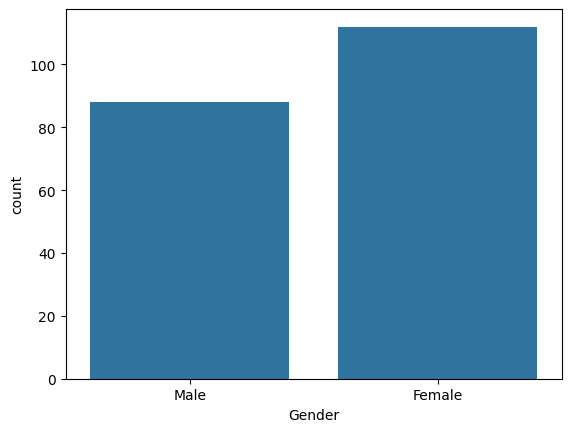

In [ ]:
sb.countplot(x=df['Gender'])

<Axes: xlabel='Gender', ylabel='Annual Income (k$)'>

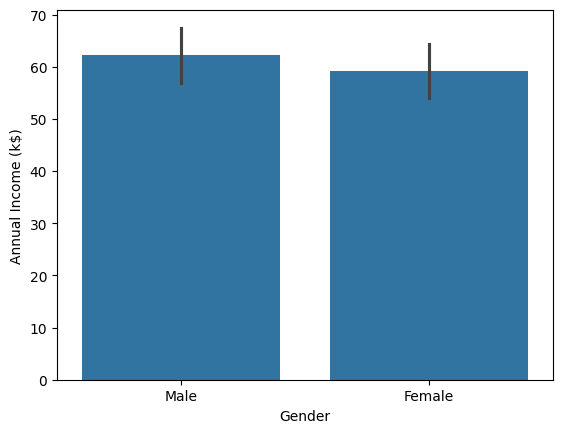

In [ ]:
sb.barplot(x='Gender', y='Annual Income (k$)', data=df)

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

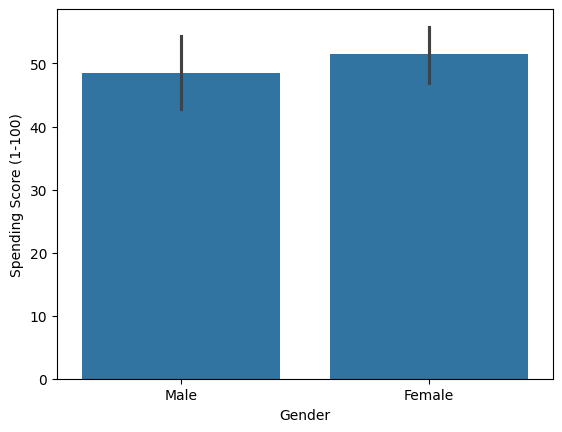

In [ ]:
sb.barplot(x='Gender', y='Spending Score (1-100)', data=df)

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

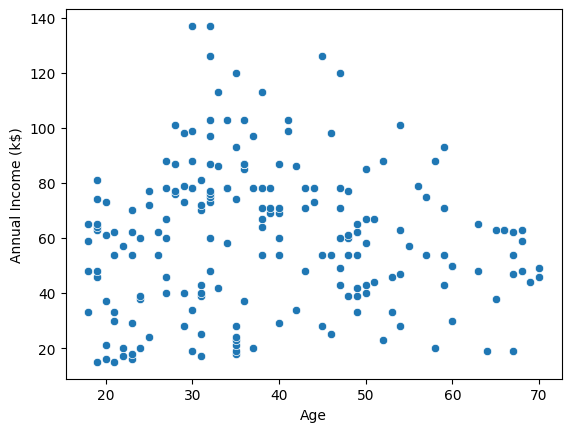

In [ ]:
sb.scatterplot(x='Age', y='Annual Income (k$)', data=df)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

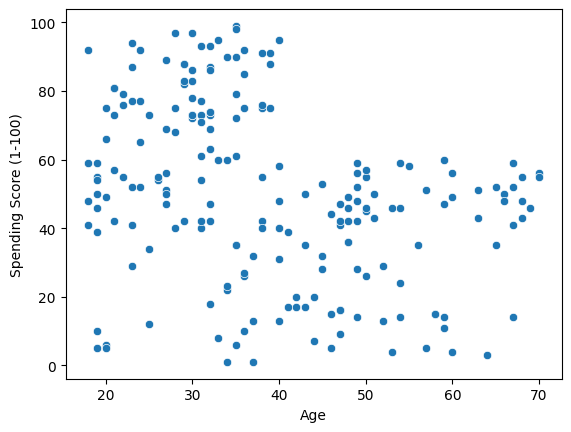

In [ ]:
sb.scatterplot(x='Age', y='Spending Score (1-100)', data=df)

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

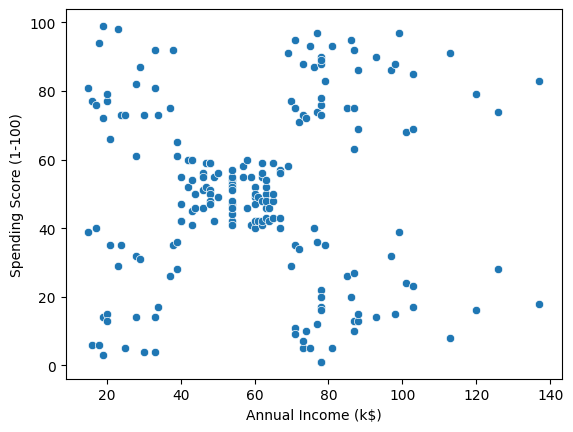

In [ ]:
sb.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

### 주요코드 미리보기
-----

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

X = df.iloc[:,3:]
sc = StandardScaler()
X = sc.fit_transform(X)

model = KMeans(n_clusters=2, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

print('실루엣 점수:{0:.4f}'.format(silhouette_score(X, y_preds)))

실루엣 점수:0.3147


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

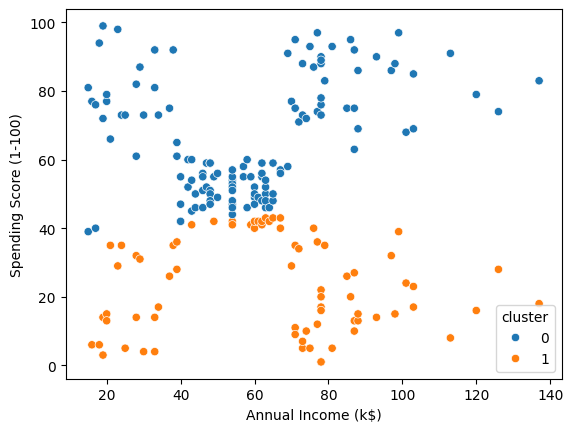

In [ ]:
sb.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='cluster')

> silhouette_score가 높지않아 k(n_cluster)의 개수를 다시 설정할 필요가 있다.

### 코드 구현하기
----

In [ ]:
silhouette_avg = []

for k in range(10):
  model = KMeans(n_clusters=k+2, random_state=42)
  y_preds = model.fit_predict(X)
  score = silhouette_score(X, y_preds)
  silhouette_avg.append(score)
  print('군집개수:{0} 일때, 평균 실루엣 점수:{1}'.format(k+2, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수:2 일때, 평균 실루엣 점수:0.3146990432802128
군집개수:3 일때, 평균 실루엣 점수:0.46658474419000145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수:4 일때, 평균 실루엣 점수:0.4939069237513199


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수:5 일때, 평균 실루엣 점수:0.5546571631111091
군집개수:6 일때, 평균 실루엣 점수:0.5398800926790663


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수:7 일때, 평균 실루엣 점수:0.5263454490712252


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수:8 일때, 평균 실루엣 점수:0.4558438123118706
군집개수:9 일때, 평균 실루엣 점수:0.45532159949822093


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수:10 일때, 평균 실루엣 점수:0.4476280825932578


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집개수:11 일때, 평균 실루엣 점수:0.4384681464041455


In [ ]:
max(silhouette_avg)

0.5546571631111091

In [ ]:
k = silhouette_avg.index(max(silhouette_avg)) + 2
k

5

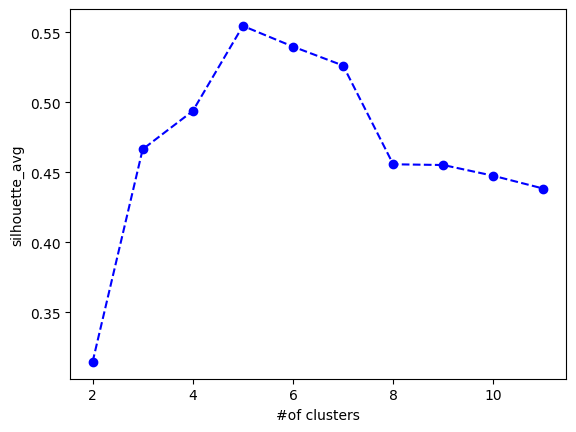

In [ ]:
plt.plot(range(2,12), silhouette_avg, 'bo--')
plt.xlabel('#of clusters')
plt.ylabel('silhouette_avg')
plt.show()

In [ ]:
# 적정 k를 찾은 후 다시 코드 시행
model = KMeans(n_clusters=5, random_state=42)
y_preds = model.fit_predict(X)
df['cluster'] = y_preds

print('실루엣 점수:{0:.4f}'.format(silhouette_score(X, y_preds)))

실루엣 점수:0.5547


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

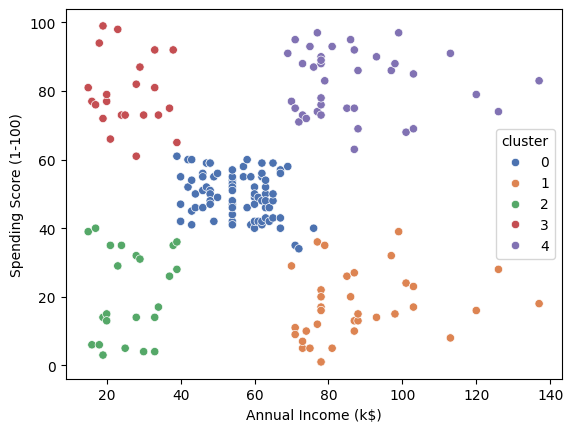

In [ ]:
sb.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='cluster', palette='deep')

<ipython-input-22-de9f90f8cf9a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='cluster', y='Spending Score (1-100)', data=df, palette='deep')


<Axes: xlabel='cluster', ylabel='Spending Score (1-100)'>

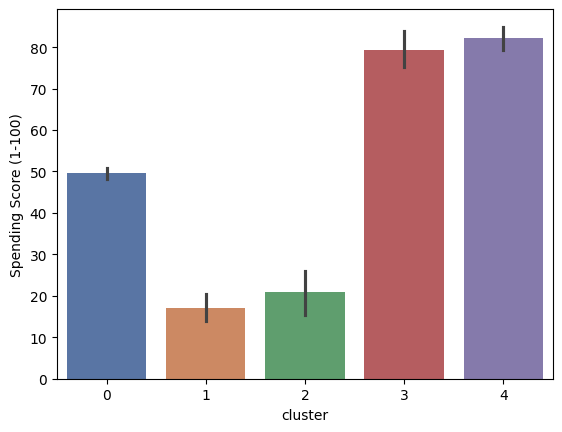

In [ ]:
sb.barplot(x='cluster', y='Spending Score (1-100)', data=df, palette='deep')

<Axes: xlabel='cluster', ylabel='count'>

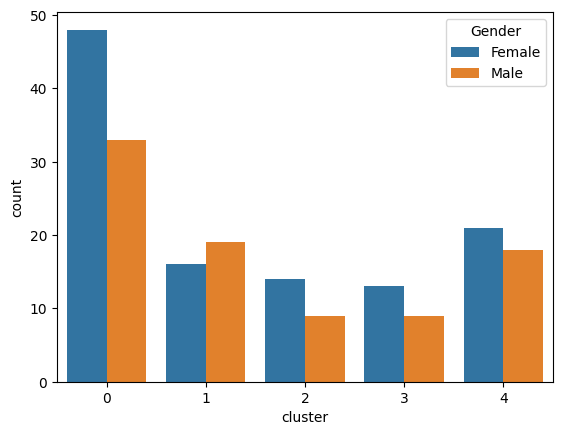

In [ ]:
sb.countplot(x='cluster', data=df, hue='Gender')

<ipython-input-25-aec06f095a7e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.swarmplot(x='cluster', y='Age', data=df, palette='deep')


<Axes: xlabel='cluster', ylabel='Age'>

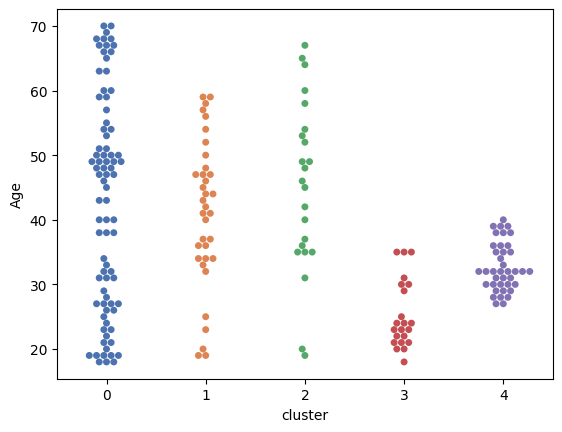

In [ ]:
sb.swarmplot(x='cluster', y='Age', data=df, palette='deep')